In [2]:
!pip install seaborn --break-system-packages
!pip install scikit-learn --break-system-packages

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
from glob import glob
from sklearn.model_selection import train_test_split

In [7]:
import cv2
from skimage import exposure

In [8]:
def load_images_from_folder(folder, extensions=['.jpg', '.png', '.jpeg']):
    image_files = []
    for filename in os.listdir(folder):
        if any(filename.lower().endswith(ext) for ext in extensions):
            image_files.append(os.path.join(folder, filename))
    return image_files

In [9]:
print(os.getcwd())
if 'VehiclesNepal1' in os.listdir(os.getcwd()):
    print(True);

C:\Users\PRANESHKUMAR C\Downloads
True


In [10]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\PRANESHKUMAR C\Downloads


In [11]:
cd Downloads


[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\PRANESHKUMAR C\Downloads


In [12]:
dataset1_dir = "C:/Users/PRANESHKUMAR C/Downloads/licence/licence"
dataset2_dir = "C:/Users/PRANESHKUMAR C/Downloads/VehiclesNepal1/VehiclesNepal1"
dataset1 = load_images_from_folder(dataset1_dir)
dataset2 = load_images_from_folder(dataset2_dir)

In [13]:
random.shuffle(dataset1)
random.shuffle(dataset2)

In [14]:
combined_dataset = dataset1 + dataset2
random.shuffle(combined_dataset)

In [15]:
print(len(combined_dataset))

3365


In [16]:
new = []
files = []
for i in combined_dataset:
    files.append(i)
    img = cv2.imread(i)
    new.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    if len(new) > 19: break

In [17]:
from PIL import Image

In [18]:
folder_name = "original"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)
    with open(file_path, 'w') as file:
        image = Image.fromarray(new[i].astype(np.uint8))
    

        image.save(file_path)
        i += 1

In [19]:
gsi = []
for i in combined_dataset:
    img = cv2.imread(i)
    gsi.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [20]:
for i in range(len(gsi)):
    gsi[i] = cv2.resize(gsi[i], (640, 480), interpolation=cv2.INTER_AREA)

## Pranesh Kumar C -- interpolation

In [21]:
folder_name = "interpolation"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
    # Save the image to the folder
        image.save(file_path)
        i+=1

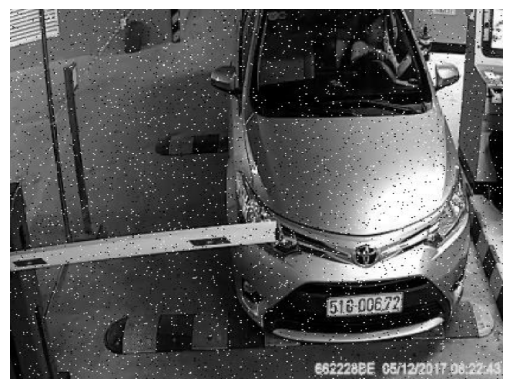

In [24]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## D Sathishwaran -- Adaptive Clahe

In [25]:
def calculate_dynamic_params(image):
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
        
    mean_intensity = np.mean(gray_image)
    std_dev = np.std(gray_image)
    
    clip_limit = min(3.0, max(1.0, std_dev / 50))
    
    height, width = gray_image.shape
    tile_size = min(height, width) // 10
    tile_grid_size = (tile_size, tile_size)

    return clip_limit, tile_grid_size

In [26]:
for i in range(len(gsi)):
    clip_limit, tile_grid_size = calculate_dynamic_params(gsi[i])
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    gsi[i] = clahe.apply(gsi[i])

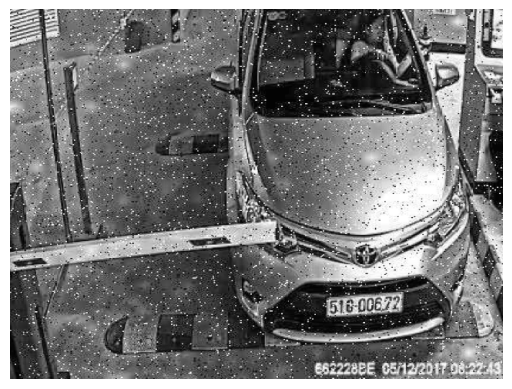

In [27]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [28]:
folder_name = "clahe"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  # Combine folder and file name
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
        image.save(file_path) 
        i+=1

## Maha Vishnu -- thresholding

In [29]:
for i in range(len(gsi)):
    _, binary_image = cv2.threshold(gsi[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    gsi[i] = binary_image

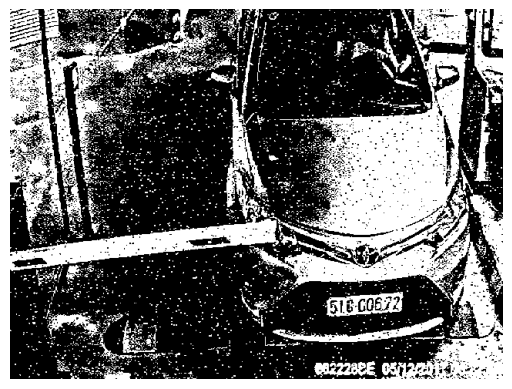

In [30]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
  
folder_name = "threshold"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  # Combine folder and file name
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
        image.save(file_path) 
        i+=1

## Dharshan K -- Median Blur

In [32]:
for i in range(len(gsi)):
    gsi[i] = cv2.medianBlur(gsi[i],3)

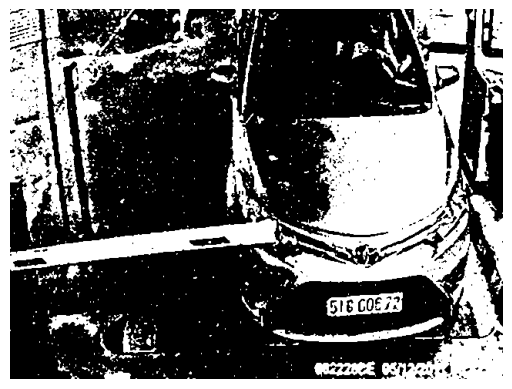

In [33]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [34]:
  
folder_name = "median"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  # Combine folder and file name
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
        image.save(file_path) 
        i+=1

## Maha Vishnu -- Sobel

In [35]:
for i in range(len(gsi)):
    sobel_x = cv2.Sobel(gsi[i], cv2.CV_64F, 1, 0, ksize=1)  # Sobel in X direction
    sobel_y = cv2.Sobel(gsi[i], cv2.CV_64F, 0, 1, ksize=1)  # Sobel in Y direction

    # Calculate the magnitude of gradients (combined X and Y)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Normalize the magnitude to the range [0, 255] for visualization
    gsi[i] = np.uint8(sobel_combined / np.max(sobel_combined) * 255)

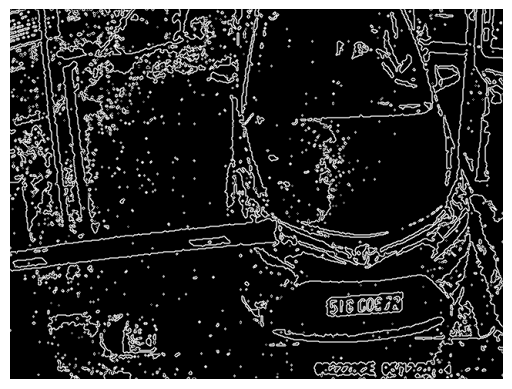

In [36]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [37]:
   
folder_name = "sobel"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  # Combine folder and file name
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
        image.save(file_path) 
        i+=1

## Dharshan K -- Gamma correction

In [38]:
for i in range(len(gsi)):
    gsi[i] = exposure.adjust_gamma(gsi[i],gamma = 1.0)

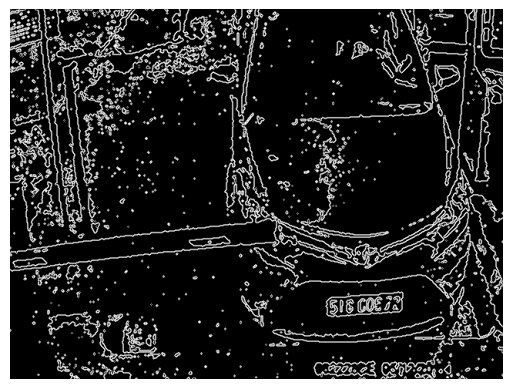

In [40]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [41]:
 
folder_name = "gamma"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  # Combine folder and file name
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
        image.save(file_path) 
        i+=1

## D Sathishwaran -- Laplacian

In [42]:
kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])

for i in range(len(gsi)):
    gsi[i] = cv2.filter2D(gsi[i], -1, kernel)
    

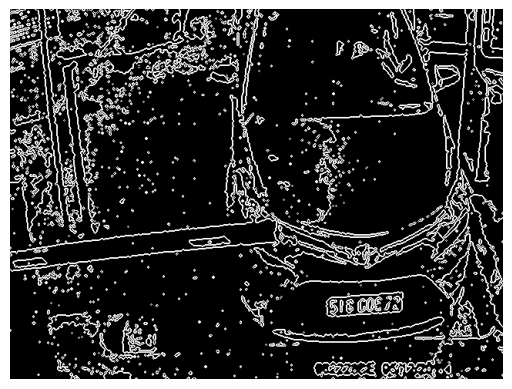

In [43]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [44]:

folder_name = "laplacian"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
i = 0
for file_name in files:
    file_path = os.path.join(folder_name, file_name)  # Combine folder and file name
    with open(file_path, 'w') as file:
        image = Image.fromarray(gsi[i].astype(np.uint8))  # Ensure the array is in uint8 format
    
        image.save(file_path) 
        i+=1

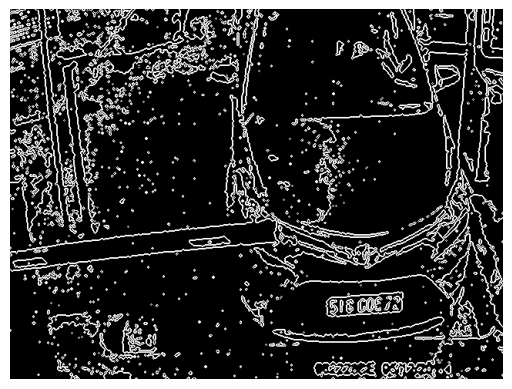

In [45]:
img = cv2.cvtColor(gsi[2100], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
import easyocr

In [4]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
import random

In [5]:
img = cv2.imread("C:/Users/PRANESHKUMAR C/OneDrive/Pictures/Screenshots/Screenshot 2024-10-28 021532.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction


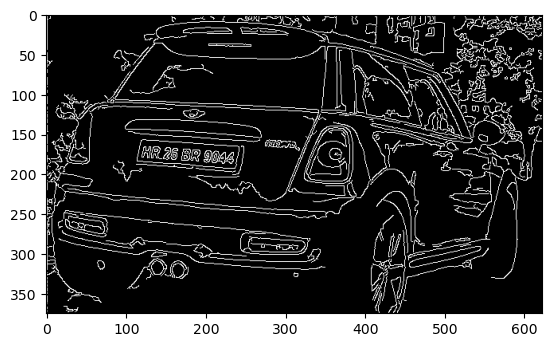

In [6]:
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Dharshan K -- contours

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours 
contours = imutils.grab_contours(keypoints) #Grab contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours


In [8]:

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)


Location:  [[[114 179]]

 [[237 193]]

 [[242 166]]

 [[121 157]]]


## Pranesh Kumar C -- Masking

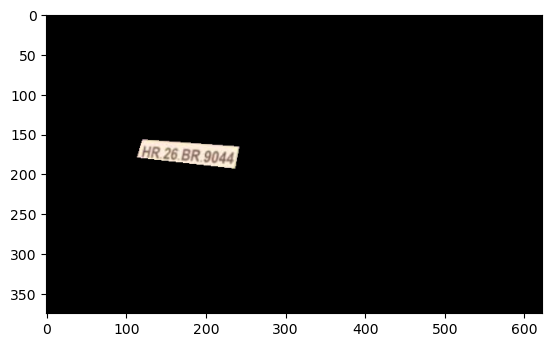

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


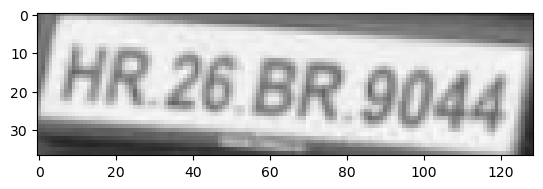

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


## Pranesh Kumar C -- easyocr

In [11]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 2], [128, 2], [128, 34], [0, 34]],
  '[HR 26 BR 9044',
  0.6030525556269718)]

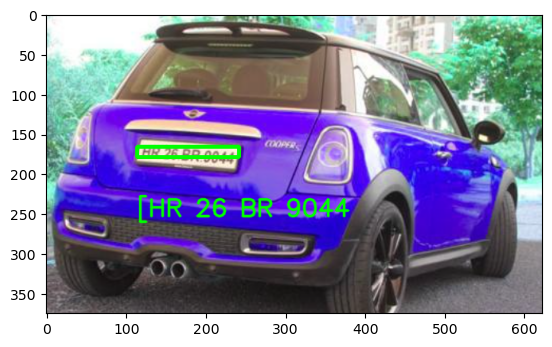

In [12]:
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text


In [5]:
img = cv2.imread("C:/Users/PRANESHKUMAR C/OneDrive/Desktop/Licenseplateinfog1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction


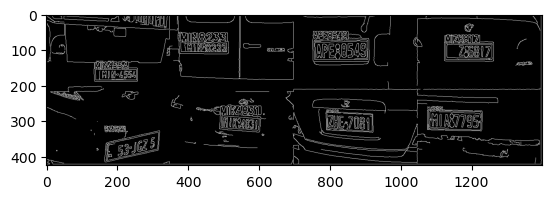

In [6]:
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours 
contours = imutils.grab_contours(keypoints) #Grab contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours


In [8]:

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)


Location:  [[[320 328]]

 [[171 362]]

 [[166 416]]

 [[316 383]]]


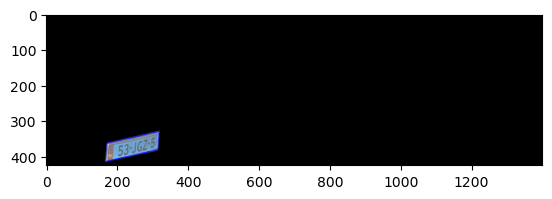

In [9]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image


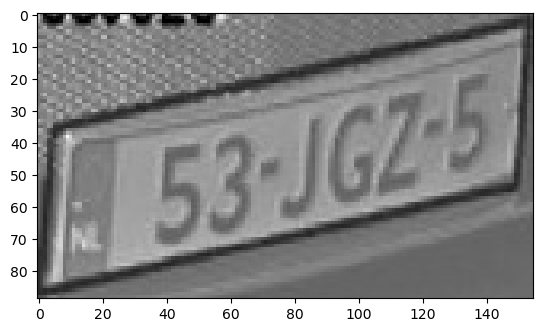

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



In [11]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[22.636636030018437, 36.30029963302028],
   [147.24880855911167, 9.364165060551105],
   [156.36336396998155, 54.69970036697972],
   [30.75119144088835, 81.6358349394489]],
  '(53 JGZ51',
  0.1374329020093552)]

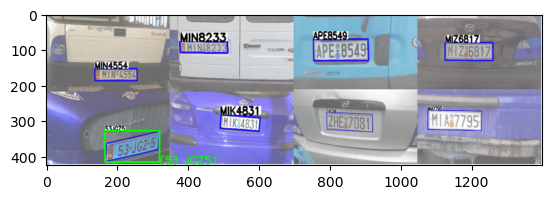

In [12]:
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text
